# Text classification

![alt text](https://miro.medium.com/max/1400/1*ljCBykAJUnvaZcuPYwm4_A.png)

# The 20 newsgroups text dataset

## Loading data

In [ ]:
from sklearn.datasets import fetch_20newsgroups

# loading train data
newsgroups_train = fetch_20newsgroups(subset='train')
#newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True)

# loading test data
newsgroups_test = fetch_20newsgroups(subset='test')

## Exploring data

In [ ]:
from pprint import pprint

pprint(newsgroups_train.target_names)

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']


In [ ]:
newsgroups_train.data[0:10]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [ ]:
print("\n".join(newsgroups_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [ ]:
for i in range(0,5):
  print("\n".join(newsgroups_train.data[i].split("\n")[:3])) #prints first line of the first data file
  print('\n')

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports


From: twillis@ec.ecn.purdue.edu (Thomas E Willis)
Subject: PB questions...
Organization: Purdue University Engineering Computer Network


From: jgreen@amber (Joe Green)
Subject: Re: Weitek P9000 ?
Organization: Harris Computer Systems Division


From: jcm@head-cfa.harvard.edu (Jonathan McDowell)
Subject: Re: Shuttle Launch Question
Organization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA




In [ ]:
print('Number of train instances', newsgroups_train.filenames.shape)
print('Number of test instances', newsgroups_test.filenames.shape)

Number of train instances (11314,)
Number of test instances (7532,)


In [ ]:
print(newsgroups_train.target.shape)
print(newsgroups_test.target.shape)

(11314,)
(7532,)


In [ ]:
newsgroups_train.target[0:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [ ]:
print('min class', newsgroups_train.target.min())
print('max class', newsgroups_train.target.max())

min class 0
max class 19


# Feature engineering - feature extraction

## Loading features from dicts

In [ ]:
# dictionary
measurements = [
                {'city': 'Dubai', 'temperature': 33.0},
                {'city': 'London', 'temperature': 12.},
                {'city': 'San Francisco', 'temperature': 18.3},
                ]

In [ ]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer()
fe = vec.fit_transform(measurements)

fe

<3x4 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [ ]:
print(fe)

  (0, 0)	1.0
  (0, 3)	33.0
  (1, 1)	1.0
  (1, 3)	12.0
  (2, 2)	1.0
  (2, 3)	18.3


In [ ]:
fe = fe.toarray()
print(fe)

[[ 1.   0.   0.  33. ]
 [ 0.   1.   0.  12. ]
 [ 0.   0.   1.  18.3]]


In [ ]:
vec.get_feature_names()

['city=Dubai', 'city=London', 'city=San Francisco', 'temperature']

In [ ]:
import pandas as pd

measure_data = pd.DataFrame(data = fe)
measure_data.columns = vec.get_feature_names()

In [ ]:
measure_data

,city=Dubai,city=London,city=San Francisco,temperature
0,1.0,0.0,0.0,33.0
1,0.0,1.0,0.0,12.0
2,0.0,0.0,1.0,18.3


## Text feature extraction
* The bag of words representation

### Count vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

In [ ]:
corpus = [
          'This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?',
          ]

In [ ]:
# create feature vector from corpus
X = vectorizer.fit_transform(corpus)
X

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 19 stored elements in Compressed Sparse Row format>

In [ ]:
print(X)

  (0, 8)	1
  (0, 3)	1
  (0, 6)	1
  (0, 2)	1
  (0, 1)	1
  (1, 8)	1
  (1, 3)	1
  (1, 6)	1
  (1, 1)	1
  (1, 5)	2
  (2, 6)	1
  (2, 0)	1
  (2, 7)	1
  (2, 4)	1
  (3, 8)	1
  (3, 3)	1
  (3, 6)	1
  (3, 2)	1
  (3, 1)	1


In [ ]:
# feature vector
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 1 0 1 0 2 1 0 1]
 [1 0 0 0 1 0 1 1 0]
 [0 1 1 1 0 0 1 0 1]]


In [ ]:
# label - feature names
vectorizer.get_feature_names()

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']

#### create feature vector from new text

In [ ]:
vectorizer.transform(['Something completely new.']).toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
vectorizer.transform(['This is the second second document.']).toarray()

array([[0, 1, 0, 1, 0, 2, 1, 0, 1]])

### N-gram
* bigram

In [ ]:
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2),
                                    token_pattern=r'\b\w+\b', min_df=1)
analyze = bigram_vectorizer.build_analyzer()

In [ ]:
analyze('Bi-grams are cool!')

['bi', 'grams', 'are', 'cool', 'bi grams', 'grams are', 'are cool']

In [ ]:
#bigram - the vocabulary extracted
X_2 = bigram_vectorizer.fit_transform(corpus).toarray()
X_2

array([[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]])

### Tf-idf term weighting

In [ ]:
corpus = [
          'This is the first document.',
          'This is the second second document.',
          'And the third one.',
          'Is this the first document?',
          ]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(corpus)
X_counts.shape

(4, 9)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

In [ ]:
X_tfidf = X_tfidf.toarray()
print(X_tfidf)

[[0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]
 [0.         0.27230147 0.         0.27230147 0.         0.85322574
  0.22262429 0.         0.27230147]
 [0.55280532 0.         0.         0.         0.55280532 0.
  0.28847675 0.55280532 0.        ]
 [0.         0.43877674 0.54197657 0.43877674 0.         0.
  0.35872874 0.         0.43877674]]


# Machine learning

## Naive Bayes (NB)

### Creating feature vector

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(newsgroups_train.data)

X_test_counts = count_vect.transform(newsgroups_test.data)

In [ ]:
print(X_train_counts.shape)
print(X_test_counts.shape)

(11314, 130107)
(7532, 130107)


In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(11314, 130107)
(7532, 130107)


### Training data using Naive Bayes

In [ ]:
# check size of train and test data
print(X_train_tfidf.shape)
print(newsgroups_train.target.shape)

print(X_test_tfidf.shape)
print(newsgroups_test.target.shape)

(11314, 130107)
(11314,)
(7532, 130107)
(7532,)


In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf = clf.fit(X_train_tfidf, newsgroups_train.target)

### Predicting test data

In [ ]:
# Performance of NB Classifier
import numpy as np

predicted = clf.predict(X_test_tfidf)
np.mean(predicted == newsgroups_test.target)

0.7738980350504514

### accuracy score

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(newsgroups_test.target, predicted)

0.7738980350504514

### classification report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(newsgroups_test.target, predicted))

              precision    recall  f1-score   support

           0       0.80      0.52      0.63       319
           1       0.81      0.65      0.72       389
           2       0.82      0.65      0.73       394
           3       0.67      0.78      0.72       392
           4       0.86      0.77      0.81       385
           5       0.89      0.75      0.82       395
           6       0.93      0.69      0.80       390
           7       0.85      0.92      0.88       396
           8       0.94      0.93      0.93       398
           9       0.92      0.90      0.91       397
          10       0.89      0.97      0.93       399
          11       0.59      0.97      0.74       396
          12       0.84      0.60      0.70       393
          13       0.92      0.74      0.82       396
          14       0.84      0.89      0.87       394
          15       0.44      0.98      0.61       398
          16       0.64      0.94      0.76       364
          17       0.93    

### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(newsgroups_test.target, predicted))

[[166   0   0   1   0   1   0   0   1   1   1   3   0   6   3 123   4   8
    0   1]
 [  1 252  15  12   9  18   1   2   1   5   2  41   4   0   6  15   4   1
    0   0]
 [  0  14 258  45   3   9   0   2   1   3   2  25   1   0   6  23   2   0
    0   0]
 [  0   5  11 305  17   1   3   6   1   0   2  19  13   0   5   3   1   0
    0   0]
 [  0   3   8  23 298   0   3   8   1   3   1  16   8   0   2   8   3   0
    0   0]
 [  1  21  17  13   2 298   1   0   1   1   0  23   0   1   4  10   2   0
    0   0]
 [  0   1   3  31  12   1 271  19   4   4   6   5  12   6   3   9   3   0
    0   0]
 [  0   1   0   3   0   0   4 364   3   2   2   4   1   1   3   3   4   0
    1   0]
 [  0   0   0   1   0   0   2  10 371   0   0   4   0   0   0   8   2   0
    0   0]
 [  0   0   0   0   1   0   0   4   0 357  22   0   0   0   2   9   1   1
    0   0]
 [  0   0   0   0   0   0   0   1   0   4 387   1   0   0   1   5   0   0
    0   0]
 [  0   2   1   0   0   1   1   3   0   0   0 383   1   0   0   3

In [ ]:
# install python package
!pip install -q scikit-plot

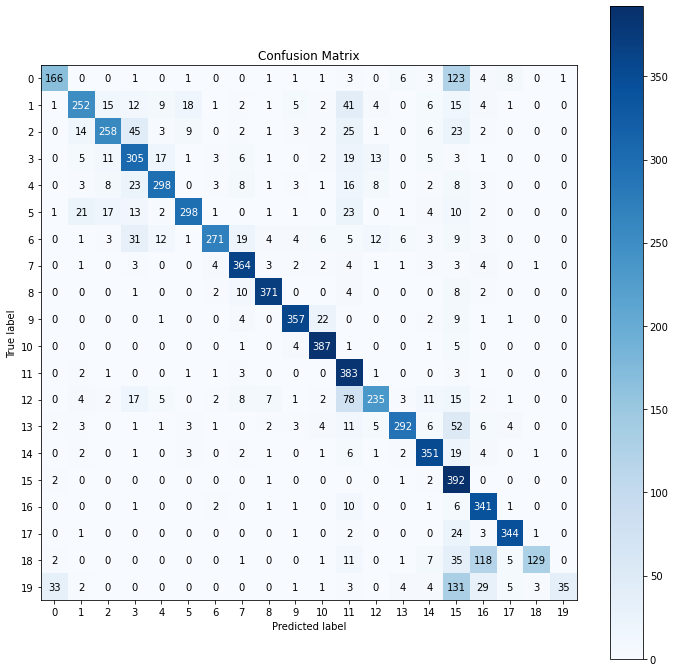

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    newsgroups_test.target, 
    predicted, 
    figsize=(12,12))

### cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cross_score = cross_val_score(clf, X_train_tfidf, newsgroups_train.target, cv=5, scoring='recall_macro')
print(cross_score)
print('Average:', np.average(cross_score))

[0.83263535 0.82639709 0.82621982 0.82267228 0.82857016]
Average: 0.8272989381933493


### Building pipeline

In [ ]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
# The names ‘vect’ , ‘tfidf’ and ‘clf’ are arbitrary but will be used later.
# We will be using the 'text_clf' going forward.
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

#training
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), 
                     ('clf', MultinomialNB())])
text_clf = text_clf.fit(newsgroups_train.data, newsgroups_train.target)

#predict
predicted = text_clf.predict(newsgroups_test.data)
accuracy_score(newsgroups_test.target, predicted)

0.7738980350504514

In [ ]:
# Training Support Vector Machines - SVM and calculating its performance

from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier())])

text_clf_svm = text_clf_svm.fit(newsgroups_train.data, newsgroups_train.target)
predicted_svm = text_clf_svm.predict(newsgroups_test.data)
accuracy_score(newsgroups_test.target, predicted)

0.7738980350504514